Dataset size: (168, 9)


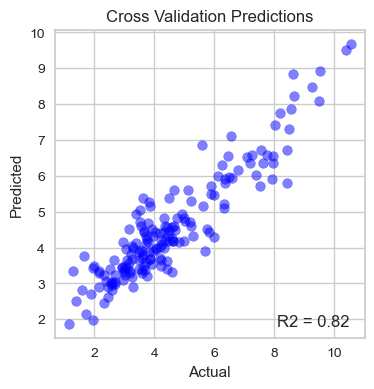

In [4]:
import sys

sys.path.append("../")

import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from src import plot_multiomics
from straindesignxai.main import DataLoader

file_path = "../data/carotenoid_training_data.csv"
model_path = "../models/xgb_carotenoid.pkl"

input_var = ["ERG8", "ERG10", "ERG12", "ERG13", "ERG19", "ERG20", "IDI1", "tHMG1"]
response_var = ["prod"]

d = DataLoader(file_path, input_var, response_var)  

# load or train ml model
try:
    d.load_model(model_path)
except FileNotFoundError:
    d.train_xgb(n_iter=500)
    d.save_model(model_path)

d.plot_R2()

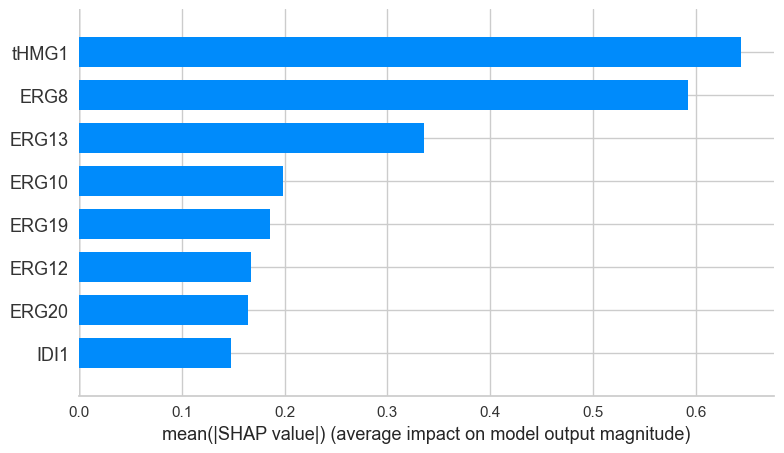

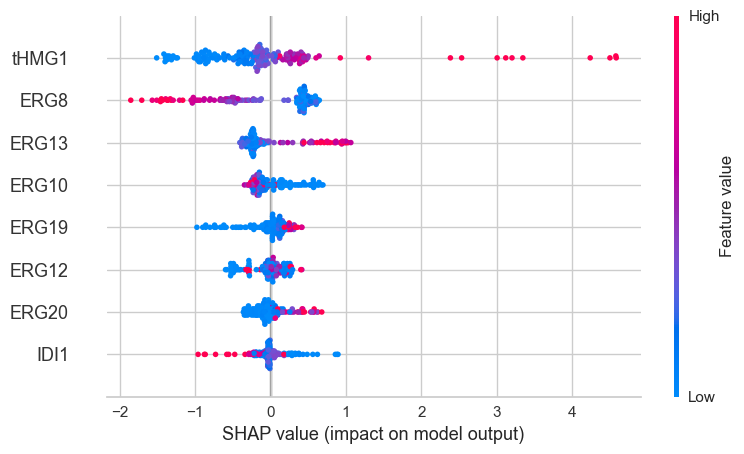

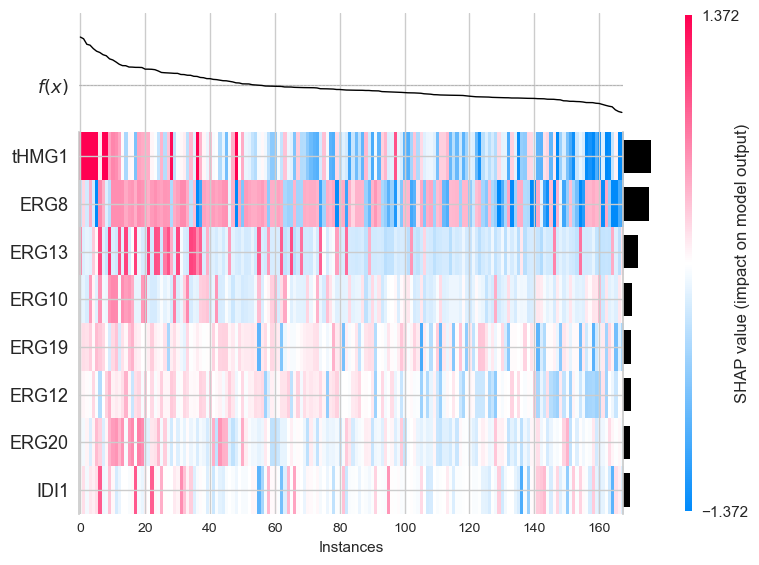

In [5]:
d.get_shap_values()